Importing Required Libraries

Using Random Forest Regressor to train the model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Analysis

In [2]:
data=pd.read_csv("gld_price_data.csv")

Correlation Analysis

<AxesSubplot:>

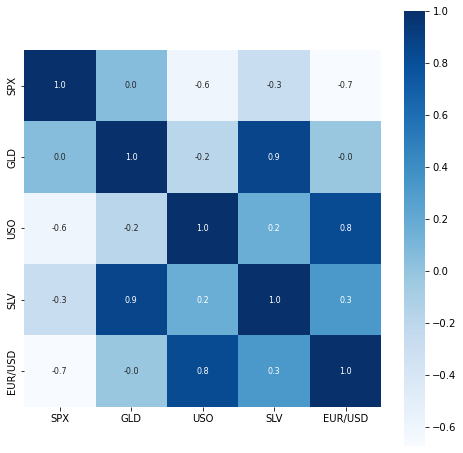

In [6]:
correlation=data.corr()
#constructing heatmap

plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [7]:
#correlation values of GLD
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

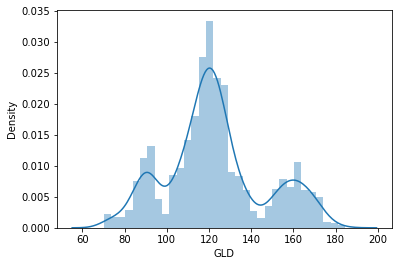

In [8]:
#checking distribution of GLD price
sns.distplot(data['GLD'])

Splitting Features and target(GLD)

In [9]:
raw_data=data.drop(['Date','GLD'],axis=1)
gld_data=data['GLD']

Split Data into train and test data

In [11]:
data_train,data_test,target_train,target_test=train_test_split(raw_data,gld_data,test_size=0.2,random_state=2)

Model Training : Random Forest Rregressor

In [12]:
regressor=RandomForestRegressor(n_estimators=100)

In [13]:
#training
regressor.fit(data_train,target_train)

RandomForestRegressor()

Model Evaluation

In [15]:
target_pred=regressor.predict(data_test)

#R squared error
error=metrics.r2_score(target_test,target_pred)

Compare test values with predicted values

In [17]:
target_test=list(target_test)


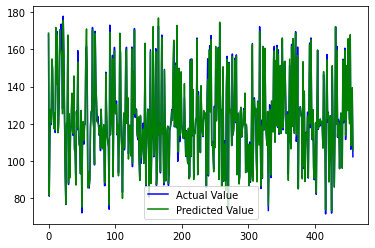

In [18]:
plt.plot(target_test,color='blue',label='Actual Value')
plt.plot(target_pred,color='green',label='Predicted Value')
plt.legend()
plt.show()

In [20]:
data_test

,SPX,USO,SLV,EUR/USD
903,1351.949951,38.330002,32.900002,1.324854
129,1271.510010,93.900002,13.450000,1.472581
1787,1880.050049,8.910000,14.340000,1.119996
1913,2181.300049,10.960000,18.620001,1.127142
2048,2352.949951,10.680000,17.320000,1.067247
...,...,...,...,...
923,1370.869995,41.090000,33.220001,1.327492
1693,1952.290039,14.930000,13.990000,1.129089
2054,2349.010010,11.060000,17.430000,1.064453
658,1273.849976,37.680000,28.420000,1.315686


In [23]:
test_input=(1447.16,78.37,15.285,1.474491)
input_array=np.asarray(test_input)
input_array=input_array.reshape(1,-1)

#output array for input data
output=regressor.predict(input_array)
output[0]

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


85.45309976999992

Saving the Model

In [24]:
import pickle

In [25]:
filename='Gold_Predictor.sav'
pickle.dump(regressor,open(filename,'wb'))

In [26]:
#loading the saved Regressor
loaded_regressor=pickle.load(open(filename,'rb'))